In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

###  **Call the Data**

In [22]:
# creates the dataframe
#names = ["age","job","marital","education","default","balance","housing","loan","contact","month","day","month","duration","campaign", "pdays","previous","poutcome","y"]
colnames = ["age","job","marital","education","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome","y"]
# read files
data1 = pd.read_csv("C:/Users/cege/bank-full.csv", names=colnames, delimiter=";",skiprows=range(0,1))
data1.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
18817,28,blue-collar,married,secondary,no,144,yes,yes,cellular,31,jul,7,22,-1,0,unknown,no
8975,39,blue-collar,single,primary,no,-491,no,yes,unknown,5,jun,179,1,-1,0,unknown,no
43184,51,technician,married,tertiary,no,0,no,no,cellular,2,mar,539,2,-1,0,unknown,yes
29298,53,management,married,tertiary,no,1759,no,no,cellular,2,feb,220,3,-1,0,unknown,no
25856,33,self-employed,single,secondary,no,4,yes,no,cellular,19,nov,136,2,180,2,failure,no
30559,32,blue-collar,divorced,primary,no,158,yes,no,cellular,5,feb,728,4,253,1,failure,no
41807,62,services,married,primary,no,276,no,no,cellular,14,oct,80,2,-1,0,unknown,no
33584,32,blue-collar,married,secondary,no,950,yes,yes,cellular,20,apr,219,4,-1,0,unknown,no
7292,44,services,married,secondary,no,361,yes,no,unknown,29,may,217,1,-1,0,unknown,no
34981,29,technician,single,tertiary,no,-803,yes,yes,cellular,6,may,827,1,329,9,failure,no


In [23]:
# data structure check
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### no idea why the dtype - integer is not shown here

In [24]:
# find number of rows and column
data1.shape

(45211, 17)

In [25]:
# describe df numerical columns
data1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Mean, std dev, min and max not shown,I think, because of dtype integer not recognised


In [26]:
# unique values from categorical features
for col in data1.select_dtypes(include='object').columns:
    print(col)
    print(data1[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


###  There are no present non-required column

### Check for missing values

In [29]:
features_na = [features for features in data1.columns if data1[features].isnull().sum() > 0]
# isnull().issum - adds the number of null values
for feature in features_na:
    print(feature, np.round(data1[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


### CHeck for column with only 1 unique values

In [31]:
for column in data1.columns:
    print(column,data1[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


### Explore the Categorical Features

In [33]:
categorical_features=[feature for feature in data1.columns if ((data1[feature].dtypes=='O') & (feature not in ['y']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [34]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data1[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4


### Find Categorical Feature Distribution

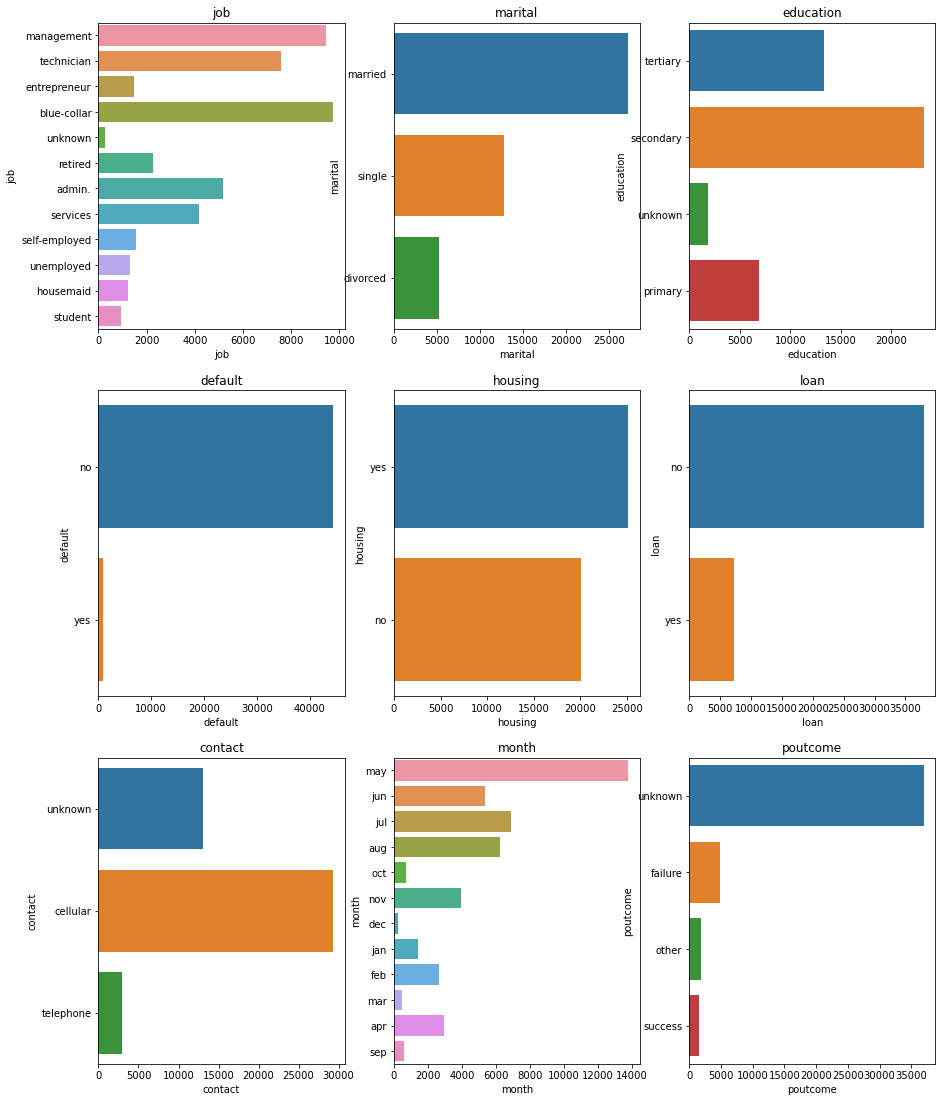

In [36]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for CF in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=CF,data=data1)
    plt.xlabel(CF)
    plt.title(CF)
    plotnumber+=1
plt.show()

Take-away:

-client with job type as management records are high in given dataset and student are very less

-client whoes education background is secondary are in high numbers in given dataset

-defualt feature seems to be does not play importand role as it has value of no at high ratio to value yes which can drop

-data in month of may is high and less in dec

### Relationship between Categorical Features and Label

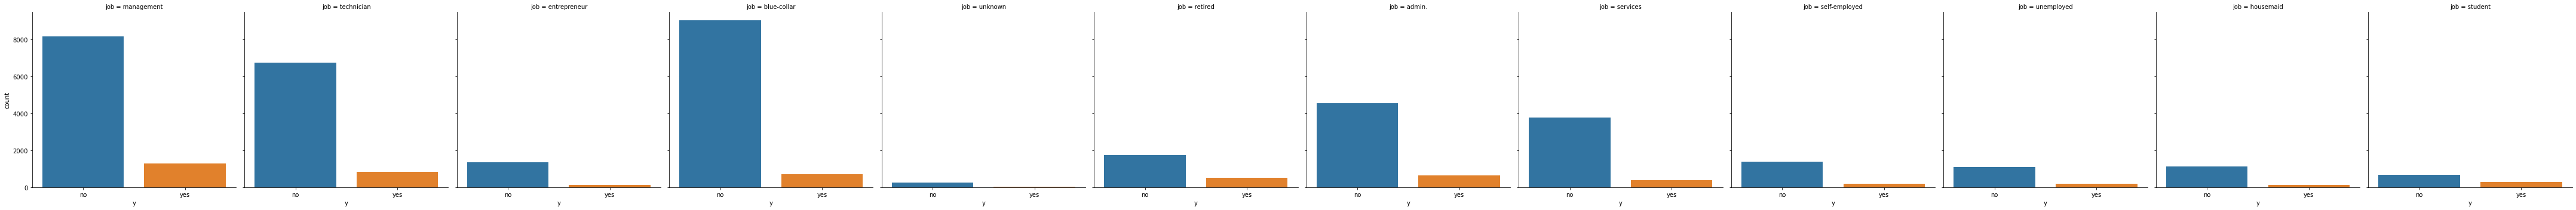

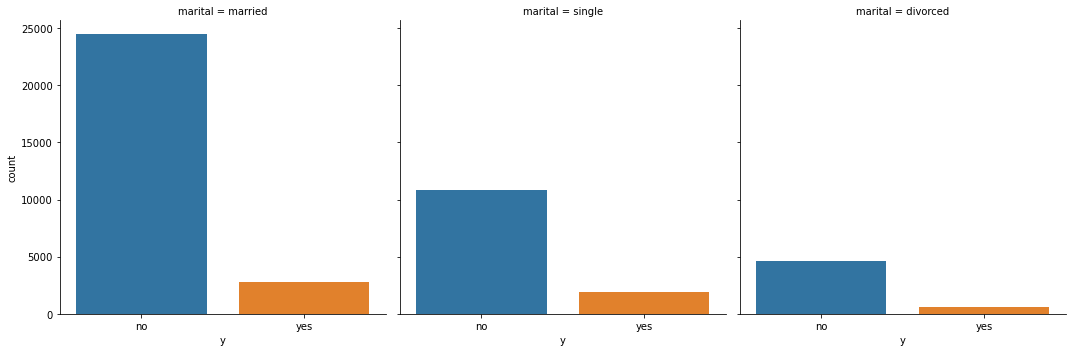

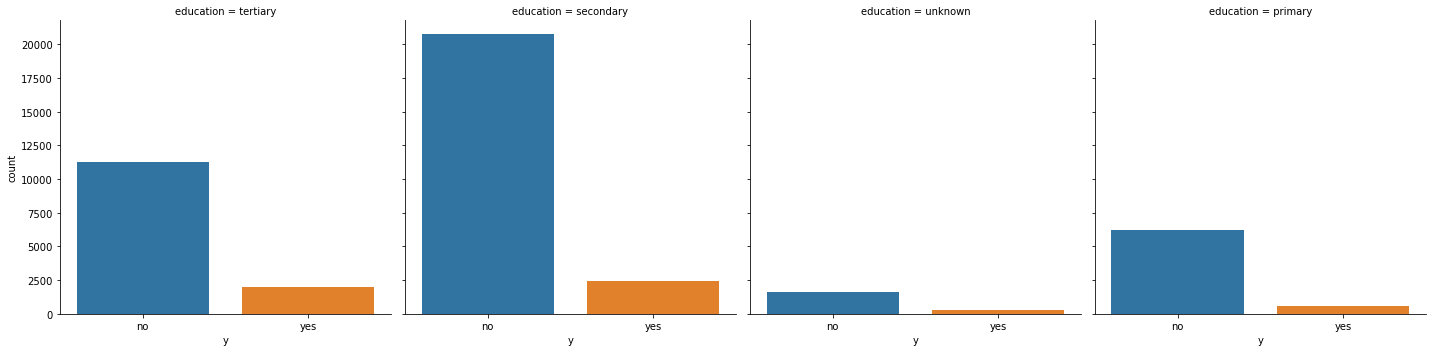

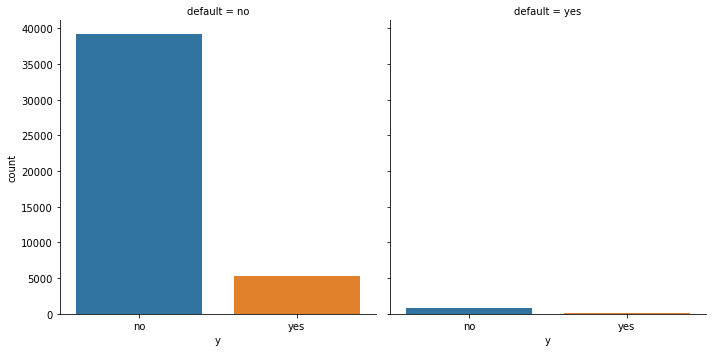

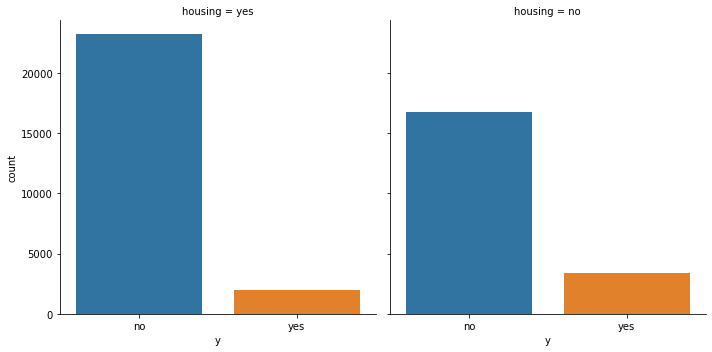

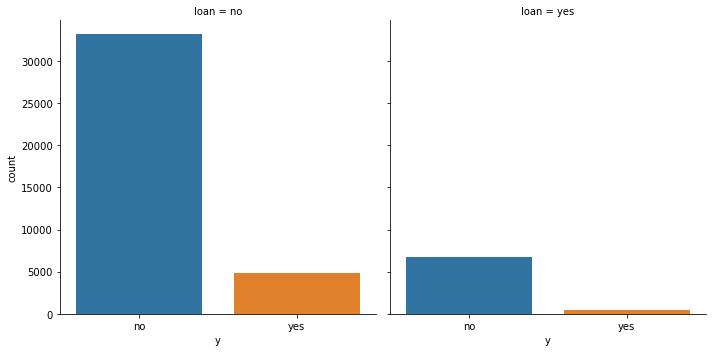

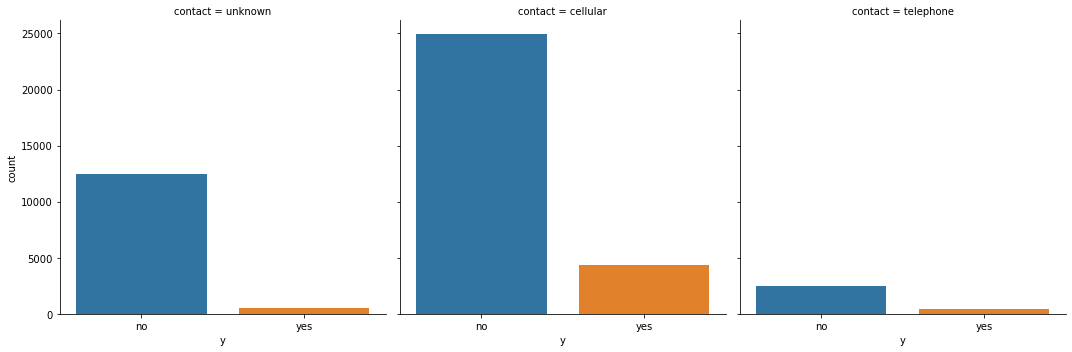

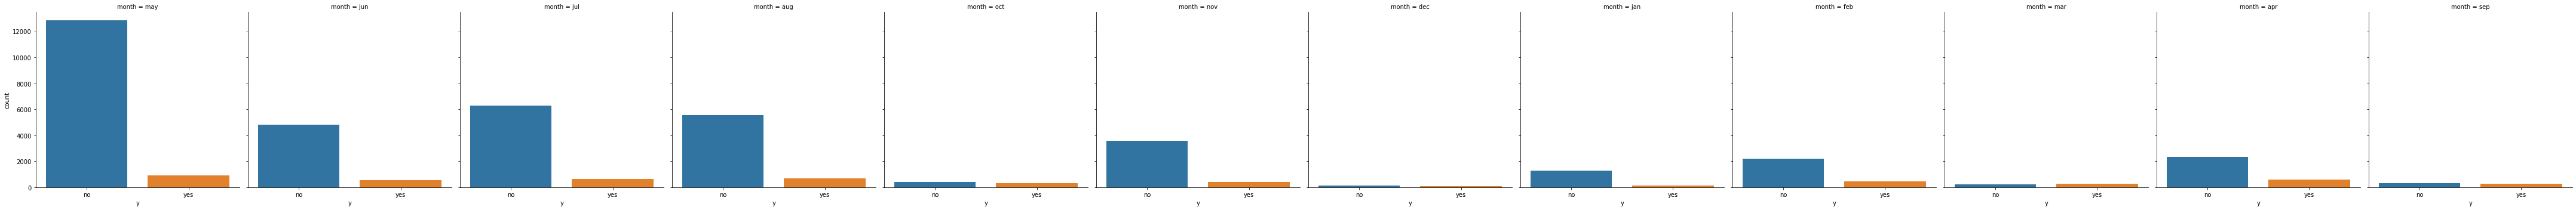

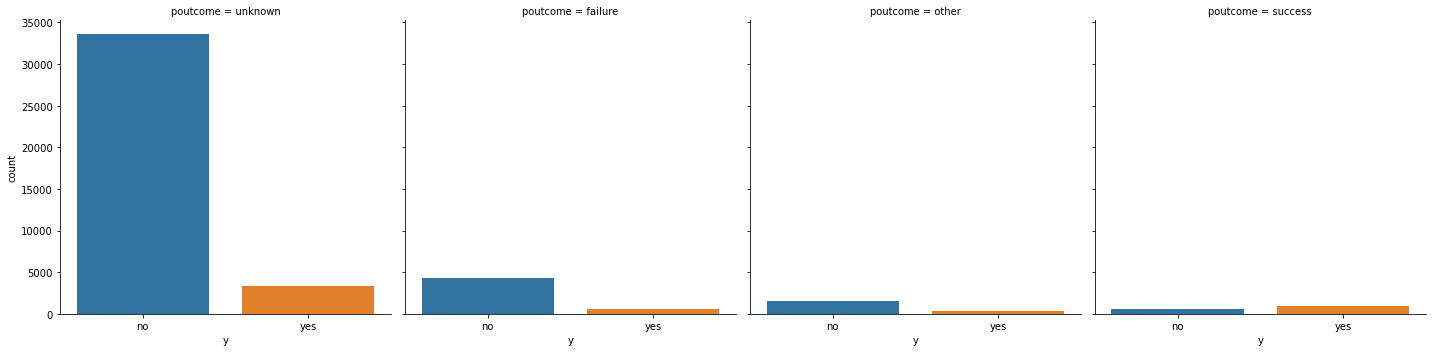

In [37]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for CF in categorical_features:
    sns.catplot(x='y', col=CF, kind='count', data= data1)
plt.show()

### Explore the Numerical Features

In [40]:
# list of numerical variables
# dytpes != (not equal to) Objects
numerical_features = [feature for feature in data1.columns if ((data1[feature].dtypes != 'O') & (feature not in ['y']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data1[numerical_features].head()

Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


### Find Discrete Numerical Features

In [42]:
discrete_feature=[feature for feature in numerical_features if len(data1[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))


Discrete Variables Count: 0


### Relation between Discrete numerical Features and Labels

#### not applicable

###  Find Continous Numerical Features

In [44]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


### Distribution of Continous Numerical Features

C:\Users\cege\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cege\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cege\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

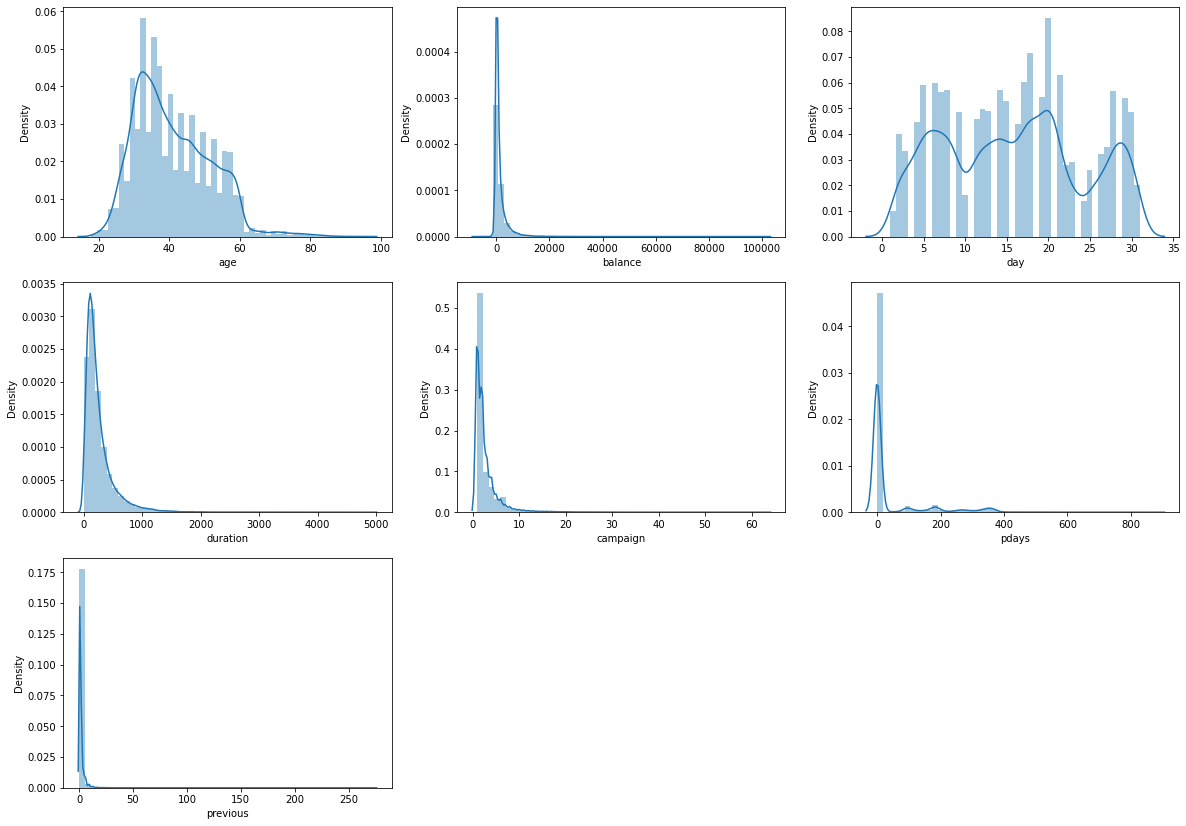

In [45]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(data1[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

Take-away:

it seems age, days distributed normally

balance, duration, compaign, pdays and previous heavely skewed towards left and seems to be have some outliers.

### Relation between Continous numerical Features and Labels

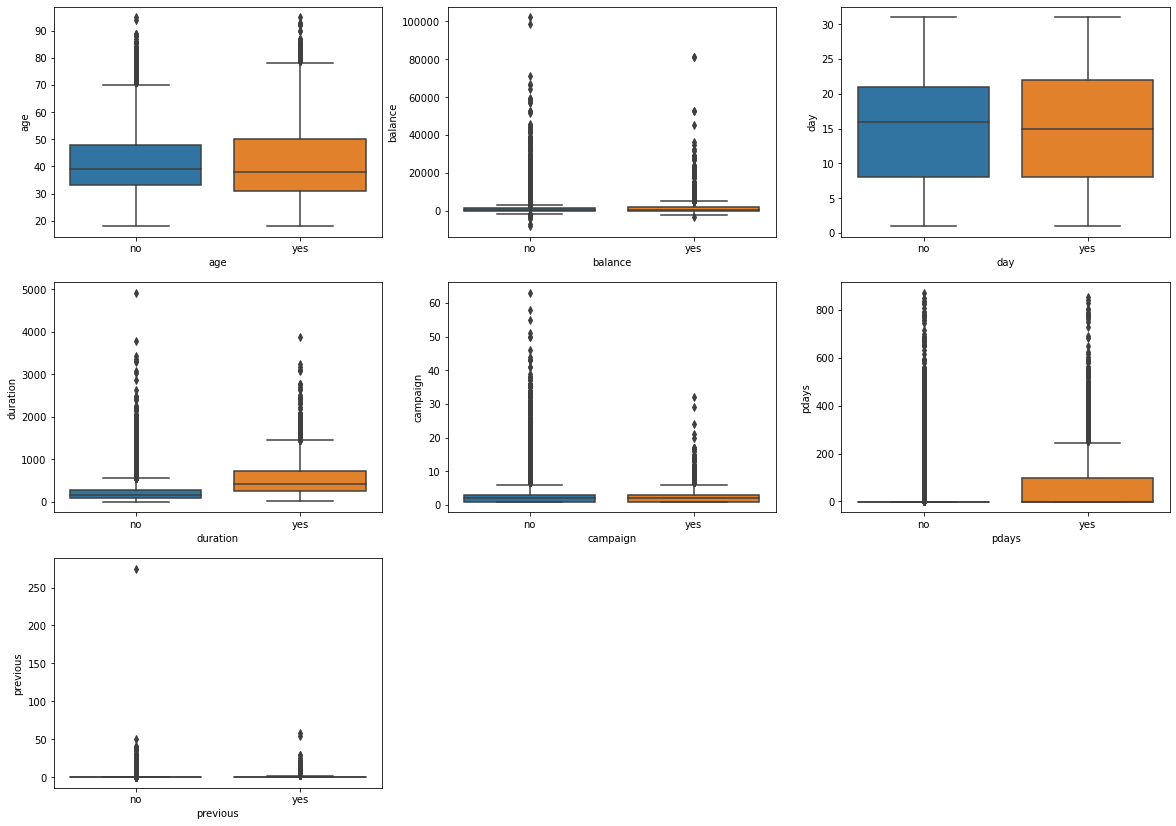

In [48]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= data1[feature], data=data1)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

Take-away:

client shows interest on deposit (y) who had discussion for longer duration

### Find Outliers in numerical features

C:\Users\cege\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\cege\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\cege\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\cege\miniconda3\lib\si

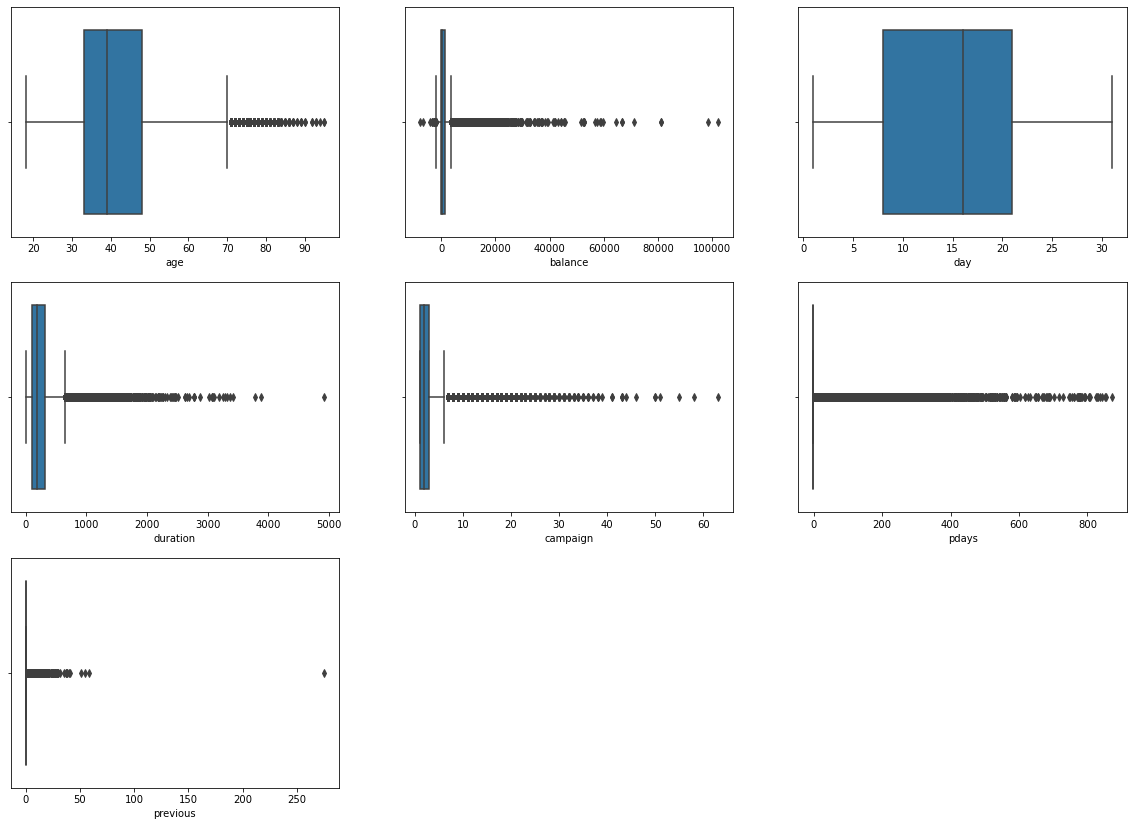

In [49]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(data1[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

Take-away:

age, balance, duration, compaign, pdays and previous has some outliers

### Explore the Correlation between numerical features

<AxesSubplot:>

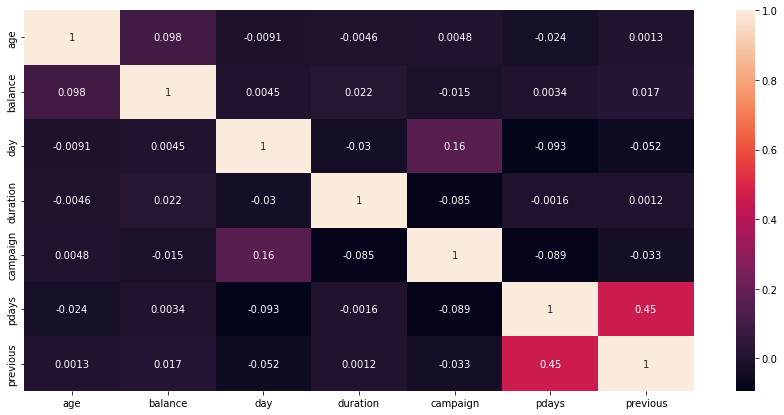

In [51]:
## Checking for correlation
cor_mat=data1.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

Take-away:

it seems no feature is heavily correlated with other features

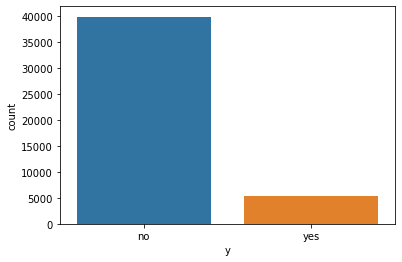

In [53]:
#total patient count based on cardio_results
sns.countplot(x='y',data=data1)
plt.show()

In [57]:
data1['y'].groupby(data1['y']).count()

y
no     39922
yes     5289
Name: y, dtype: int64

Take-away:

given dataset seems to be skewed in favour of no.
